# Laboratorio 1: Regresión en California

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "California Housing dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix


import matplotlib.pyplot as plt

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [2]:
from sklearn.datasets import fetch_california_housing
X_california, y_california = fetch_california_housing(return_X_y=True, as_frame=True)
california = fetch_california_housing()

In [3]:
X_california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
y_california.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [5]:
print(X_california.shape, y_california.shape)

(20640, 8) (20640,)


In [6]:
y_california.count

<bound method Series.count of 0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64>

In [7]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [8]:

print(california['DESCR'])  # descripción del dataset
#california['feature_names'] # nombres de los atributos para cada columna de 'data'
#california['data']           # matriz con los datos de entrada (atributos)
#print(california['target']) # vector de valores a predecir

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [9]:
california['data'].shape, california['target'].shape

((20640, 8), (20640,))

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [10]:
from sklearn.model_selection import train_test_split
X, y = california['data'], california['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((16512, 8), (4128, 8))

In [45]:
X_train.shape

(16512, 8)

In [46]:
X_test.shape

(4128, 8)

In [11]:
y.shape

(20640,)

In [12]:
y_test.shape

(4128,)

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

## Respuesta Ejercicio 1

**El dataset se encuentra incluido en la libreria sklearn, a traves de la misma podemos obtener algunas respuestas**

In [53]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [13]:
print(california.DESCR)


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

1. El conjunto de datos trata sobre las casas de California y viene del censo de EE. UU. de 1990, utilizando una fila por grupo de bloques censales. Un grupo de bloques es la unidad geográfica más pequeña para la cual la Oficina del Censo de EE. UU. publica datos de muestra (un grupo de bloques suele tener una población de 600 a 3000 personas).

        Un hogar es un grupo de personas que residen dentro de una casa. Dado que la cantidad promedio de habitaciones y dormitorios en este conjunto de datos se proporciona por hogar, estas columnas pueden tomar valores sorprendentemente grandes para grupos de bloques con pocos hogares y muchas casas vacías, como centros vacacionales.

2. La variable objetivo es el precio medio de las casas "MedHouseVal" para los distritos de California, expresado en cientos de miles de dólares ($100.000). En donde la libreria sklearn nos da esta columna como "target"

3. Los atributos disponibles son:

        - MedInc        ingreso mediano del bloque
        - HouseAge      edad mediana del hogar en el bloque
        - AveRooms      número medio de habitaciones por hogar
        - AveBedrms     número promedio de dormitorios por hogar
        - Population    población del bloque
        - AveOccup      número promedio de personas que ocupan el hogar
        - Latitude      latitud del bloque
        - Longitude     longitud del bloque

4. Los atributos más determinantes para la predicción, imaginamos que serían el ingreso mediano (MedInc), el número de habitaciones (AveRooms) y la zona (latitud y longitud). Vamos a encontrar que atributos son determinantes realizando un analisis de correlación.


<Axes: >

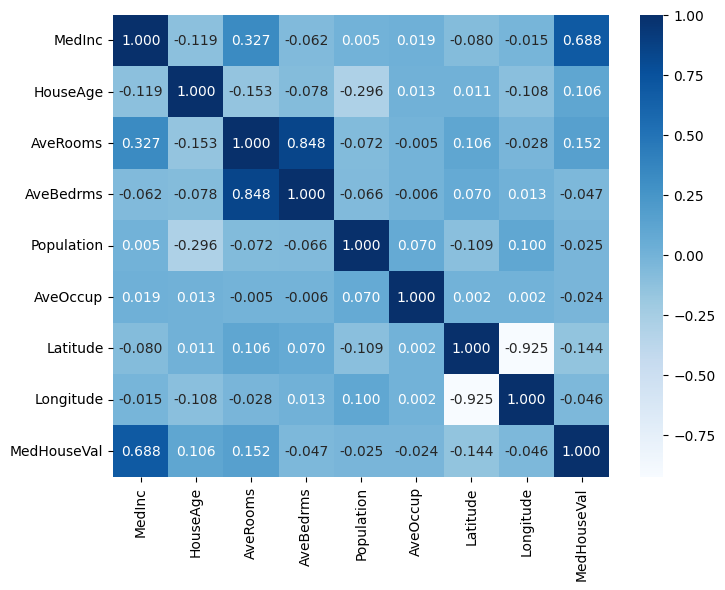

In [14]:
# correlation matrix
data = pd.concat([X_california, y_california], axis=1)
corr = data.corr()

# heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(data=corr, annot=True, fmt='.3f', cmap='Blues')


**La matriz de correlacion nos indica que los atributos a tener en cuenta para la prediccion de "MedHouseVal" son:**

1. MedInc
2. HouseAge
3. AveRooms

5. Uno de los problemas a priori que observamos es que los datos son de 1990, por lo que no son datos relativamente actuales. Otro problema podría ser que los datos son únicamente de California, por lo que no se pueden extrapolar a otros estados. Por otro lado, hay columnas como population que tienen valores muy dispersos, debido a como es censada la información.


## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

## Respuesta Ejercicio 2: Visualización de los Datos


1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.

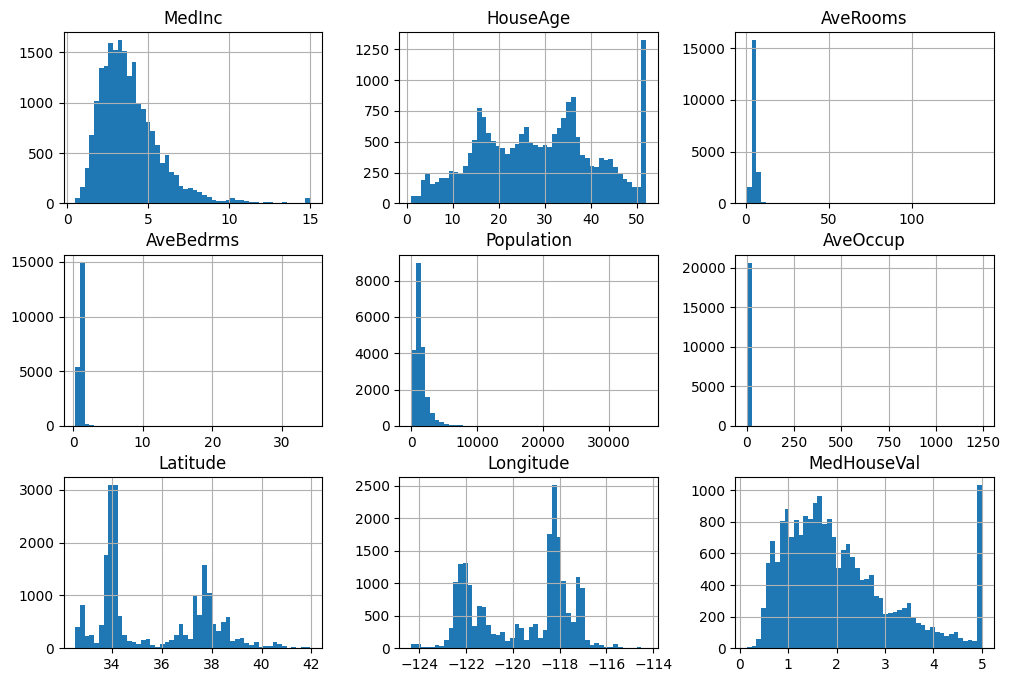

In [15]:
data.hist(bins=50, figsize=(12,8))
plt.show()

De los histogramas anteriores de las diferentes características, podemos concluir que:
1. Las características se distribuyen en escalas muy diferentes.
2. En las columnas HouseAge y HouseValue, los valores tienen un límite de 50 y 5 respectivamente.

**Ahora trazamos el valor de la vivienda con respecto a la longitud y la latitud, es decir, según la ubicación.**

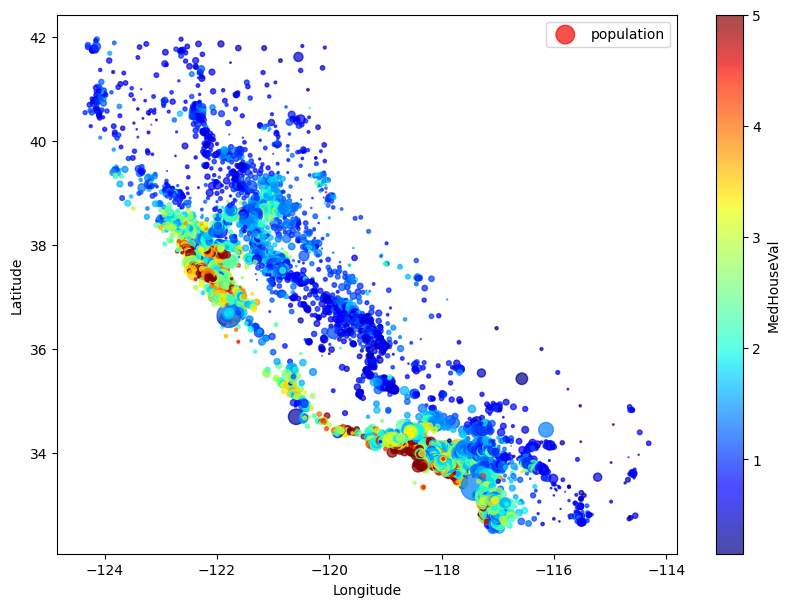

In [16]:
data.plot(kind="scatter", x="Longitude",y="Latitude", c="MedHouseVal", cmap="jet", colorbar=True, legend=True, sharex=False, figsize=(10,7), s=data['Population']/100, label="population", alpha=0.7)
plt.show()

El gráfico anterior muestra el mapa de California, con el mapa de colores correspondiente al valor de la vivienda y el radio de los círculos correspondientes a la población de las áreas. Con base en este gráfico podemos concluir que:
1. Las casas cerca del mar valoran más.
2. Las casas en zonas de alta densidad de población también se valoran más pero el efecto disminuye a medida que nos alejamos del océano.
3. Y hay algunos valores atípicos

2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.

A continuación, trazaremos la correlación entre las características entre sí.

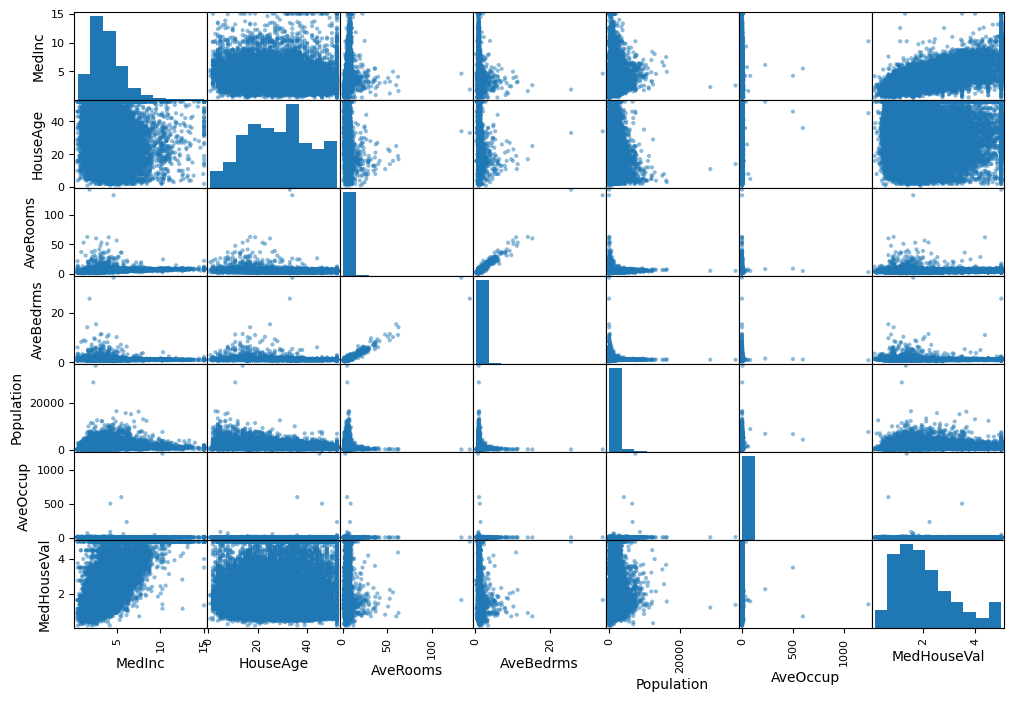

In [17]:
attributes = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup','MedHouseVal']
scatter_matrix(data[attributes], figsize=(12,8))
plt.show()

Si comparamos la correlación con MedHouseVal, podemos ver que todas las demás características muestran una correlación algo débil, excepto MedInc (ingreso medio). Exploremos más

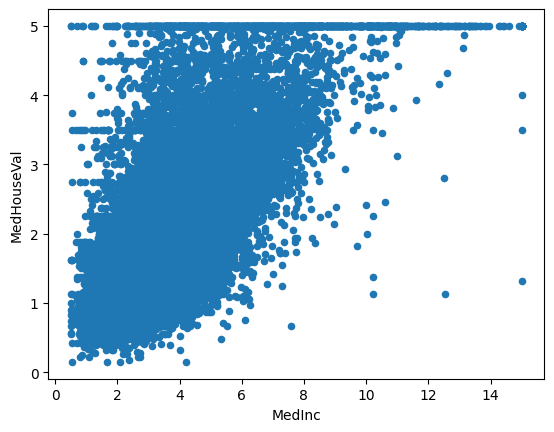

In [18]:
data.plot(kind="scatter", x="MedInc",y="MedHouseVal")
plt.show()

El gráfico anterior muestra una fuerte correlación lineal entre el ingreso medio y el valor de la vivienda. Esto ya lo habiamos visto en el Ejercicio_1 punto 4, en donde encontramos la matriz de correlación.

3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

In [19]:
# Para resolver este punto, listamos en orden  los atributos significativos para realizar una prediccion
corr = data.corr()
corr['MedHouseVal'].sort_values(ascending=False)

MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

## Respuesta Ejercicio 3: Regresión Lineal


1. Seleccione **un solo atributo** que considere puede ser el más apropiado.

El atributo que elegimos es "MedInc" para predecir "MedHouseVal"

2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.

La columna que tiene el atributo "MedInc" la encontramos buscando en la descripcion de set de datos California de Sklearn

In [95]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

"MedInc" es la columna "0"

In [96]:
X_train_MedInc = X_train[:, 0]
X_test_MedInc = X_test[:, 0]

In [97]:
X_train_reshape = X_train_MedInc.reshape(-1, 1)
X_test_MedInc_reshape = X_test_MedInc.reshape(-1, 1)

In [98]:
y_train_reshape = y_train.reshape(-1, 1)
y_test_reshape = y_test.reshape(-1, 1)

In [100]:
# 2. Instanciar y entrenar acá.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Instanciar
reg = LinearRegression()

# Entrenar
reg.fit(X_train_reshape, y_train_reshape)


# Realizar predicciones en el conjunto de prueba
y_pred_train = reg.predict(X_train_reshape)
y_pred_val = reg.predict(X_test_MedInc_reshape)


# Evaluamos el modelo
mse_train = mean_squared_error(y_train_reshape, y_pred_train)
mse_val = mean_squared_error(y_test_reshape, y_pred_val)
r2_train = r2_score(y_train_reshape, y_pred_train)
r2_val = r2_score(y_test_reshape, y_pred_val)


print("Coeficientes:", reg.coef_)
print("Intercepto:", reg.intercept_)
print("Error cuadrático medio (MSE) entrenemiento:", mse_train)
print("Error cuadrático medio (MSE) evaluacion:", mse_val)
print("Coeficiente de determinación (R^2) entrenamiento:", r2_train)
print("Coeficiente de determinación (R^2) evaluacion:", r2_val)


Coeficientes: [[0.42032178]]
Intercepto: [0.44320635]
Error cuadrático medio (MSE) entrenemiento: 0.6960681099171515
Error cuadrático medio (MSE) evaluacion: 0.7214982234014606
Coeficiente de determinación (R^2) entrenamiento: 0.47991412719941495
Coeficiente de determinación (R^2) evaluacion: 0.4466846804895943


4. Gráfica del modelo resultante, junto con los puntos de entrenamiento y evaluación.

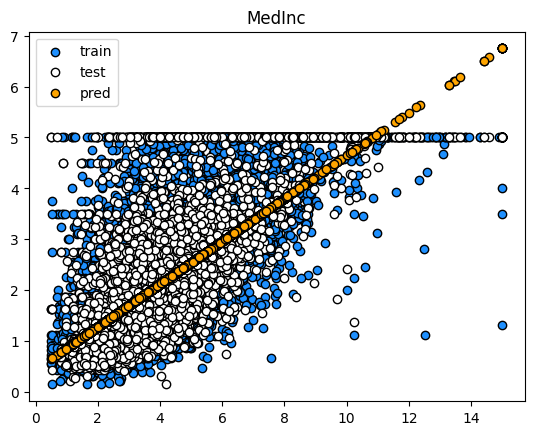

In [101]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X_train_reshape, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
ax.scatter(X_test_MedInc_reshape, y_test, facecolor="white", edgecolor="k", label="test")
ax.scatter(X_test_MedInc_reshape, y_pred_val, facecolor="orange", edgecolor="k", label="pred")

plt.title("MedInc")
plt.legend()
plt.show()

5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.


Conclusión: Si bien existe una correlación positiva, el r2 del modelo es muy pequeño (0,48), porque los datos no están distribuidos en una linea recta, si no que están dispersos.  Además los datos superiores de la variable target introducen ruido en los datos, podriamos decir que hay ciertas propiedades que son "caras" sin importar cual sea el ingreso medio. Todo esto produce que el error de entrenamiento sea alto (0.69) por lo tanto el de testeo también.

Cabe destacar que los datos originales parecen haber sufrido una transformación para los casos en que MedHouseVal hubiera sido mayor a 5.

Nuestro modelo tendrá una peor performance para los valores más grandes de MedInc.

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

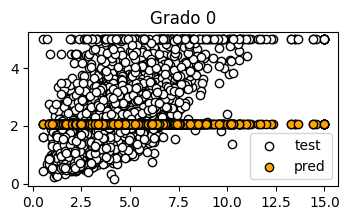

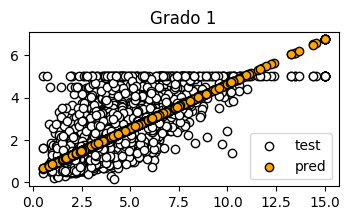

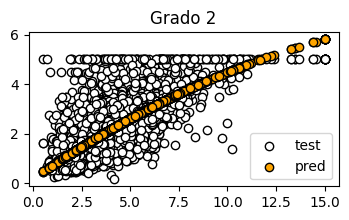

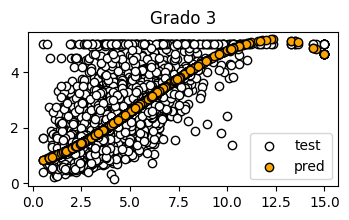

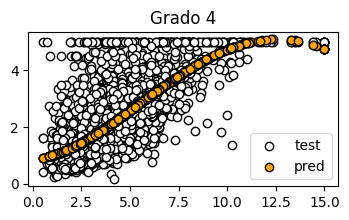

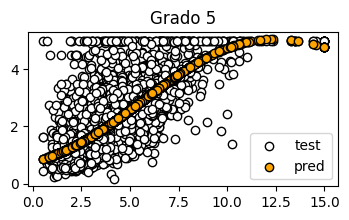

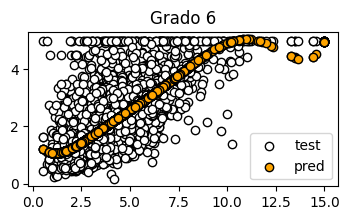

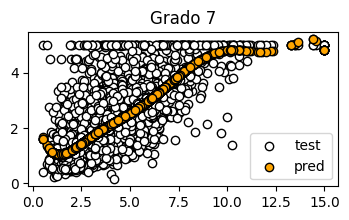

In [102]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

train_errors = []
val_errors = []
degrees = range(8)

for degree in degrees:
    # instanciar y entrenar :
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_reshape, y_train_reshape)

    # predecir:
    y_train_pred = model.predict(X_train_reshape)
    y_val_pred = model.predict(X_test_MedInc_reshape)

    # evaluar:
    train_error = mean_squared_error(y_train_reshape, y_train_pred)
    val_error = mean_squared_error(y_test_reshape, y_val_pred)
    train_errors.append(train_error)
    val_errors.append(val_error)

    fig = plt.figure(figsize=(4, 2))
    ax = fig.add_subplot()
    ax.scatter(X_test_MedInc_reshape, y_test, facecolor="white", edgecolor="k", label="test")
    ax.scatter(X_test_MedInc_reshape, y_val_pred, facecolor="orange", edgecolor="k", label="pred")

    plt.title(f"Grado {degree}")
    plt.legend()
    plt.show()

2. Grafique las curvas de error en términos del grado del polinomio.

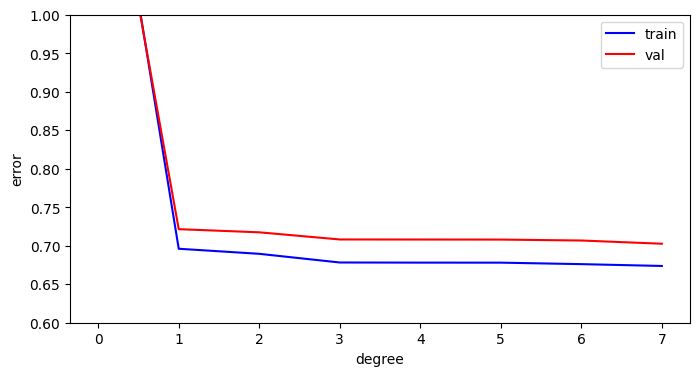

In [103]:
# 2. Graficar curvas de error acá.

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot()
ax.plot(degrees, train_errors, color="blue", label="train")
ax.plot(degrees, val_errors, color="red", label="val")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.ylim(0.6, 1)
plt.show()

3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.

Consideramos que un grado mayor a 3 complejiza el modelo y no aporta una reducción significativa en los errores, por lo que consideramos que el polinomio de grado 3 sería el más apropiado.

Con respecto al overfitting, no se observa un punto a partir del cual haya un sobreajuste. Lo que pudimos observar mediante pruebas es que, para grados superiores a 14, ambos tipos de errores se _disparan:_ tanto el error de validación como el de test.

4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.

In [18]:
# 4. Reconstruir mejor modelo acá y graficar.

**Modelo elegido**

grado 3

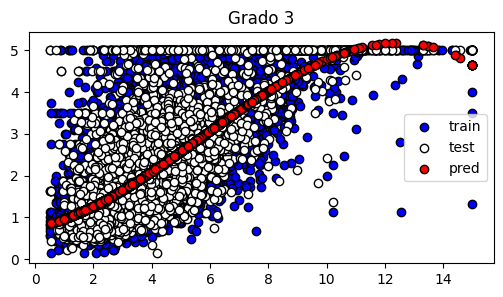

In [104]:
degree = 3
pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=False)
model = make_pipeline(pf, lr)
model.fit(X_train_reshape, y_train)
y_train_pred = model.predict(X_train_reshape)
y_val_pred = model.predict(X_test_MedInc_reshape)
train_error = mean_squared_error(y_train_reshape, y_train_pred)
val_error = mean_squared_error(y_test_reshape, y_val_pred)
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot()
ax.scatter(X_train_reshape, y_train, facecolor="blue", edgecolor="k", label="train")
ax.scatter(X_test_MedInc_reshape, y_test_reshape, facecolor="white", edgecolor="k", label="test")
ax.scatter(X_test_MedInc_reshape, y_val_pred, facecolor="red", edgecolor="k", label="pred")
plt.title(f"Grado {degree}")
plt.legend()
plt.show()

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [19]:
# 1. Resolver acá. Ayuda (con dos atributos):
selector = (np.array(california['feature_names']) == 'HouseAge') | (np.array(california['feature_names']) == 'AveRooms')

X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((16512, 2), (4128, 2))

In [20]:
# 2. Resolver acá.

## Más ejercicios (opcionales)

### Ejercicio 6: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?
